In [1]:
import zipfile
import os

# Define the path to the uploaded zip file and the extraction directory
zip_file_path = '/content/Skin.zip'
extraction_dir = '/mnt/data/skin_lesion_data/'

# Create the extraction directory if it doesn't exist
os.makedirs(extraction_dir, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_dir)

# List the contents of the extracted directory
extracted_files = os.listdir(extraction_dir)
extracted_files

['data', 'train']

In [2]:
# Explore the 'data' and 'train' directories
data_dir_content = os.listdir(os.path.join(extraction_dir, 'data'))
train_dir_content = os.listdir(os.path.join(extraction_dir, 'train'))

data_dir_content, train_dir_content

(['test', 'train'], ['benign', 'malignant'])

In [5]:
import os

data_subdirs = [os.path.join(extraction_dir, 'data', d) for d in os.listdir(os.path.join(extraction_dir, 'data')) if os.path.isdir(os.path.join(extraction_dir, 'data', d))]
train_subdirs = [os.path.join(extraction_dir, 'train', d) for d in os.listdir(os.path.join(extraction_dir, 'train')) if os.path.isdir(os.path.join(extraction_dir, 'train', d))]

data_subdirs, train_subdirs


(['/mnt/data/skin_lesion_data/data/test',
  '/mnt/data/skin_lesion_data/data/train'],
 ['/mnt/data/skin_lesion_data/train/benign',
  '/mnt/data/skin_lesion_data/train/malignant'])

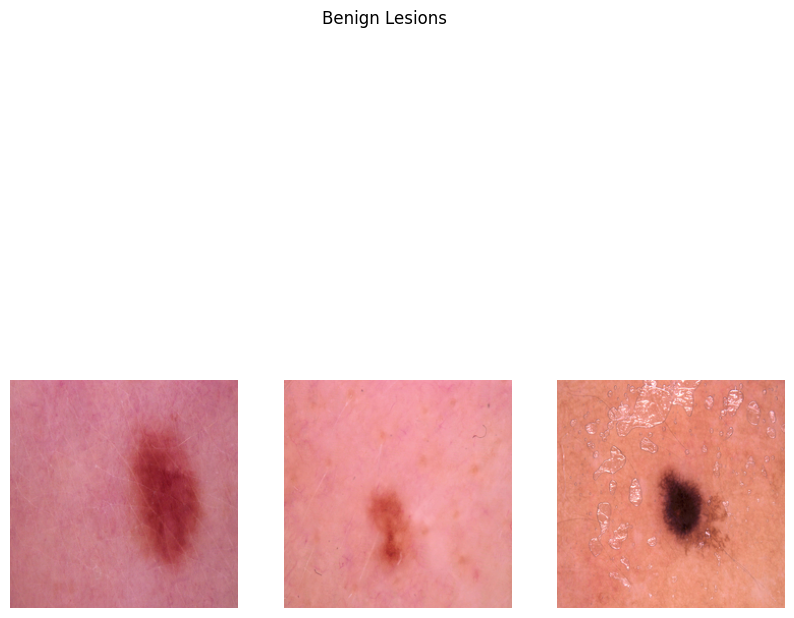

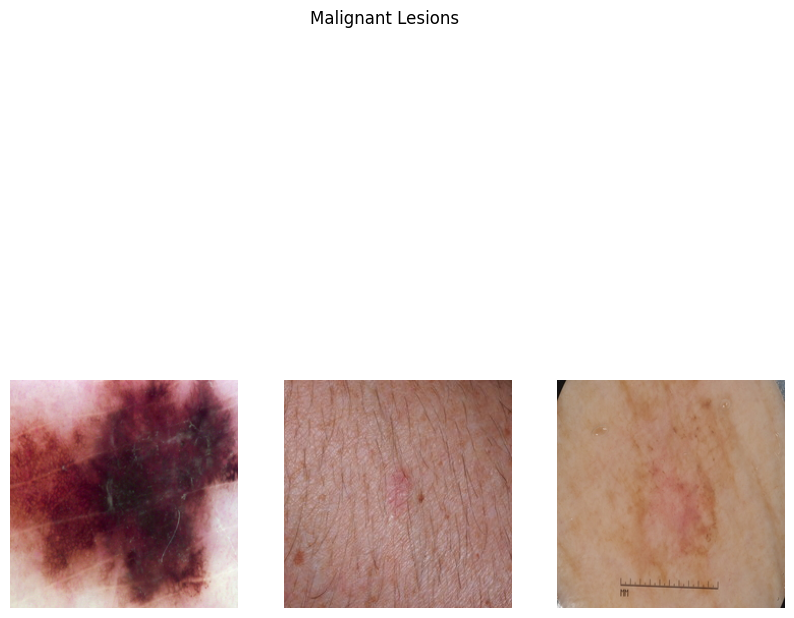

In [3]:
import matplotlib.pyplot as plt
import cv2
import random

# Define paths to the benign and malignant image directories
benign_dir = os.path.join(extraction_dir, 'train', 'benign')
malignant_dir = os.path.join(extraction_dir, 'train', 'malignant')

# List the image files in each directory
benign_images = os.listdir(benign_dir)
malignant_images = os.listdir(malignant_dir)

# Randomly select 3 images from each category for display
random_benign_images = random.sample(benign_images, 3)
random_malignant_images = random.sample(malignant_images, 3)

# Function to display images
def display_images(image_paths, title):
    plt.figure(figsize=(10, 10))
    for i, img_path in enumerate(image_paths, 1):
        plt.subplot(1, 3, i)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

# Display random benign images
display_images([os.path.join(benign_dir, img) for img in random_benign_images], 'Benign Lesions')

# Display random malignant images
display_images([os.path.join(malignant_dir, img) for img in random_malignant_images], 'Malignant Lesions')

Here are some sample images from the dataset:

The first set of images shows benign skin lesions.

The second set of images shows malignant skin lesions.

# Data Preprocessing

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Parameters
img_size = (150, 150)
batch_size = 32

# Data augmentation for the training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Data generator for the training set
train_generator = train_datagen.flow_from_directory(
    '/mnt/data/skin_lesion_data/data/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# Data generator for the test set (no data augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    '/mnt/data/skin_lesion_data/data/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

Found 2637 images belonging to 2 classes.
Found 660 images belonging to 2 classes.


# Model Building

In [7]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Model compilation

In [8]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Model Training

In [12]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=30,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size
)

Epoch 1/30
82/82 [==============================] - 183s 2s/step - loss: 0.3208 - accuracy: 0.8449 - val_loss: 0.3477 - val_accuracy: 0.8188
Epoch 2/30
82/82 [==============================] - 177s 2s/step - loss: 0.3196 - accuracy: 0.8537 - val_loss: 0.3407 - val_accuracy: 0.8406
Epoch 3/30
82/82 [==============================] - 196s 2s/step - loss: 0.3090 - accuracy: 0.8526 - val_loss: 0.2991 - val_accuracy: 0.8516
Epoch 4/30
82/82 [==============================] - 193s 2s/step - loss: 0.3017 - accuracy: 0.8595 - val_loss: 0.3467 - val_accuracy: 0.8359
Epoch 5/30
82/82 [==============================] - 179s 2s/step - loss: 0.2986 - accuracy: 0.8572 - val_loss: 0.3273 - val_accuracy: 0.8422
Epoch 6/30
82/82 [==============================] - 164s 2s/step - loss: 0.3259 - accuracy: 0.8468 - val_loss: 0.3359 - val_accuracy: 0.8359
Epoch 7/30
82/82 [==============================] - 164s 2s/step - loss: 0.3090 - accuracy: 0.8522 - val_loss: 0.2875 - val_accuracy: 0.8703
Epoch 8/30
82

# Model Evaluation

In [13]:
# Evaluate the model
loss, accuracy = model.evaluate(test_generator)
print(f"Test loss: {loss}, Test accuracy: {accuracy}")

# Save the model
model.save("skin_lesion_model.h5")

21/21 [==============================] - 12s 555ms/step - loss: 0.3185 - accuracy: 0.8515
Test loss: 0.31849056482315063, Test accuracy: 0.8515151739120483


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
